In [1]:
from keras import models, layers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Dataset selection
base_dir =  '/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog/SmallDataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
# Image data generation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Instantiate a convulation base
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
# Adding classifier on top of convulation base
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
len(model.trainable_weights)

30

In [7]:
# Freeze the convulation base
conv_base.trainable = False

In [8]:
len(model.trainable_weights)

4

In [9]:
# Compile a model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [10]:
# Train a model
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 770ms/step - loss: 0.6024 - acc: 0.6770 - val_loss: 0.4477 - val_acc: 0.8150
Epoch 2/30
100/100 [==============================] - 71s 712ms/step - loss: 0.4854 - acc: 0.7885 - val_loss: 0.3215 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 71s 711ms/step - loss: 0.4341 - acc: 0.8010 - val_loss: 0.5149 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 72s 724ms/step - loss: 0.4067 - acc: 0.8270 - val_loss: 0.3280 - val_acc: 0.8580
Epoch 5/30
100/100 [==============================] - 72s 719ms/step - loss: 0.3765 - acc: 0.8230 - val_loss: 0.3007 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 71s 714ms/step - loss: 0.3672 - acc: 0.8300 - val_loss: 0.3014 - val_acc: 0.8750
Epoch 7/30
100/100 [==============================] - 72s 718ms/step - loss: 0.3673 - acc: 0.8400 - val_loss: 0.1236 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 6

In [11]:
# Unfreeze some layers in the convulation base
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [12]:
# Compile a model
model.compile(optimizer=optimizers.RMSprop(lr=1e-5), loss='binary_crossentropy', metrics=['acc'])

In [13]:
# Jointly train a model
history2 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 92s 921ms/step - loss: 0.3024 - acc: 0.8680 - val_loss: 0.1992 - val_acc: 0.9140
Epoch 2/30
100/100 [==============================] - 90s 904ms/step - loss: 0.2776 - acc: 0.8825 - val_loss: 0.3394 - val_acc: 0.9140
Epoch 3/30
100/100 [==============================] - 88s 881ms/step - loss: 0.2353 - acc: 0.9045 - val_loss: 0.0843 - val_acc: 0.9220
Epoch 4/30
100/100 [==============================] - 90s 900ms/step - loss: 0.2059 - acc: 0.9125 - val_loss: 0.1397 - val_acc: 0.9200
Epoch 5/30
100/100 [==============================] - 91s 910ms/step - loss: 0.2139 - acc: 0.9120 - val_loss: 0.1975 - val_acc: 0.9250
Epoch 6/30
100/100 [==============================] - 92s 920ms/step - loss: 0.1966 - acc: 0.9185 - val_loss: 0.0884 - val_acc: 0.9270
Epoch 7/30
100/100 [==============================] - 91s 912ms/step - loss: 0.1668 - acc: 0.9325 - val_loss: 0.4268 - val_acc: 0.9190
Epoch 8/30
100/100 [==============================] - 9

In [15]:
# Plotting
history_dict = history2.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

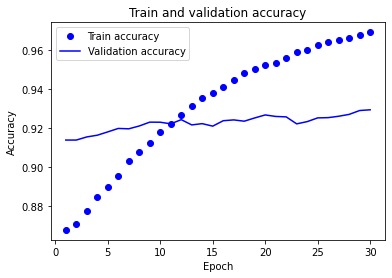

In [24]:
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(accuracy), 'bo', label='Train accuracy')
plt.plot(epochs, smooth_curve(val_accuracy), 'b', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

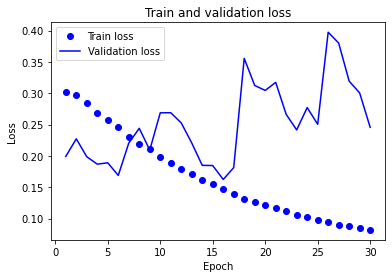

In [21]:
plt.clf()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Train loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=50)
print('Test Accuracy: ', test_accuracy)

50/50 [==============================] - 23s 468ms/step
Test Accuracy:  0.9300000071525574


# Conclusion